In [4]:
# !pip install selenium

In [1]:
# Importing a driver from selenium that will help us in scrapping the website
from selenium import webdriver

# Importing service to specify the driver executable path
from selenium.webdriver.chrome.service import Service

# Importing library to locate web element on webpage
from selenium.webdriver.common.by import By

# Importing library to parse the html content
from bs4 import BeautifulSoup

# Importing basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialize empty lists to store scraped data
titles = []
companies = []
locations = []
salaries = []
links = []



# Loop through multiple pages of job listings (0 to 2000 in steps of 10)
for i in range(0, 2000, 10):
    # Specify the link to scrape job listings
    web_to_scrape = f'https://in.indeed.com/jobs?q=python+developer&l=India&start={str(i)}&pp=gQAPAAABi5R_qt0AAAACFiYyGAAnAQEBBgs8d_Dn2glAIr_LHjhu7IJTQ-b5afRCvG3WYrw5UTxQVOhoAAA&vjk=a7d36bf719cf3408'

    # Specify the path to the Chrome WebDriver
    path_to_web_driver = r"G:/STUDY MATERIAL/THEORY/Web scrapping/Web scrapping indeed/chromedriver.exe"

    # Create a service to specify the driver executable path
    service = Service(path_to_web_driver)

    # Create ChromeOptions and specify options, including headless mode
    chrome_options = webdriver.ChromeOptions()

    # Initialize the Chrome WebDriver with service and options
    driver = webdriver.Chrome(service=service, options=chrome_options)

    # Open the webpage
    driver.get(web_to_scrape)

    # Locate elements with "ul" tag
    all_jobs = driver.find_elements(By.TAG_NAME, "ul")

    # Loop through all of the jobs listed on the page
    for job in all_jobs:
        # Capture the content available in an element
        result_html = job.get_attribute("innerHTML")

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(result_html, 'html.parser')

        # Select all "div" tags with a particular class on the page
        jobs = soup.find_all('div', class_="job_seen_beacon")

        # Loop through content available for a job
        for job in jobs:
            # Try to extract the job title
            try:
                title = job.find("span").text
            except:
                title = "None"
            titles.append(title)

            # Try to extract the company name
            try:
                company_name = job.find("div", class_="company_location css-12lvszk e37uo190")
                company = company_name.find("span").text
            except:
                company = "None"
            companies.append(company)

            # Try to extract the job location
            try:
                location = company_name.find("div")
                location = location.find("div").text
            except:
                location = "None"
            locations.append(location)

            # Try to extract the job salary
            try:
                salary = job.find("div", class_="css-1ihavw2 eu4oa1w0").text
            except:
                salary = "None"
            salaries.append(salary)

            # Try to extract the job link
            try:
                link = job.find("a").attrs["href"]
            except:
                link = "None"
            links.append(link)

    # Close the webpage
    driver.quit()


In [8]:
# Creating a dfframe for scrapped df

df = pd.DataFrame([titles,companies,locations,salaries,links]).T
df.columns = ["Title","Company","Location","Salary","Job Link"]
df

,Title,Company,Location,Salary,Job Link
0,"Manager, Commerce Development",Labcorp,"Bengaluru, Karnataka",Full-time,/pagead/clk?mo=r&ad=-6NYlbfkN0D4rQszy01BtqKc9w...
1,Python/Django Developer,Intelligent Outsourcing,"Mohali, Punjab","₹30,000 - ₹1,50,000 a month",/pagead/clk?mo=r&ad=-6NYlbfkN0CFSq8f_VUyHBFZks...
2,Python Developer,NetAnalytics USA,"Ahmedabad, Gujarat","₹20,000 - ₹60,000 a month",/pagead/clk?mo=r&ad=-6NYlbfkN0C2qdTP2B90x3YN8p...
3,Sr. Python Developer,Avatron Industries Pvt. Ltd.,"Pune, Maharashtra","₹20,000 - ₹40,000 a month",/pagead/clk?mo=r&ad=-6NYlbfkN0D0QppTbDoyZBGk3u...
4,Full Stack Developer,CREZVATIC PRIVATE LIMITED,"Mumbai, Maharashtra",Full-time,/pagead/clk?mo=r&ad=-6NYlbfkN0BVUziYx-HlQS6IcZ...
...,...,...,...,...,...
1475,Devops Engineer,ZF,"Bengaluru, Karnataka",None,/pagead/clk?mo=r&ad=-6NYlbfkN0CI8DGm6kMHhNw9RN...
1476,Engineer SR. Software,Giant Eagle GCC,Karnataka,None,/pagead/clk?mo=r&ad=-6NYlbfkN0B9Z5kUrYpJSl1jY-...
1477,Senior Manager - (Data Security/ Data Management),Capital One,"Bengaluru, Karnataka",Full-time,/pagead/clk?mo=r&ad=-6NYlbfkN0C3j_zLGvpMLCdiZ0...
1478,Senior Software Engineer,Intuit,"Bengaluru, Karnataka",None,/pagead/clk?mo=r&ad=-6NYlbfkN0BKYl3zWsktiTMfhn...


In [9]:
# Adding host name to remaining link

for row in range(df.shape[0]):
    df.loc[row,"Job Link"] = "https://in.indeed.com"+df.loc[row,"Job Link"]

In [10]:
# Droping the Internship jobs

df = df.drop(df[df["Salary"]=="Internship"].index.to_list())
df.shape

(1439, 5)

In [11]:
# Resetting the indexes

df = df.reset_index(drop=True)


In [12]:
# Highliting the rows without required df

val = []

for row in df["Salary"]:
    if "₹" in row:
        val.append(row)
    else:
        val.append("Not Given")

df["Salary"] = val

In [13]:
import re

val = []

for row in df["Salary"]:

    # converting monthly salary to annual salary and removing extra detail from that cell
    if "month" in row:
        res = re.sub(r"[A-Za-z ₹,]*","",row)
        if "-" in res:
            min,max = res.split("-")
            min,max = int(float(min)*12),int(float(max)*12)
            average_val = (max+min)/2
            val.append(int(average_val))
        else:
            min = int(float(res) * 12)
            val.append(min)

    # Removing extra detail from year salary row
    elif "year" in row:
        res = re.sub(r"[A-Za-z ₹,]*","",row)
        if "-" in res:
            min,max = res.split("-")
            min,max = int(float(min)),int(float(max))
            average_val = (max+min)/2
            val.append(int(average_val))
        else:
            min = int(float(res))
            val.append(min)

    # converting daily salary to annual salary and removing extra detail from that cell
    elif "day" in row:
        res = re.sub(r"[A-Za-z ₹,]*","",row)
        if "-" in res:
            min,max = res.split("-")
            min,max = int(float(min)*360),int(float(max)*360)
            average_val = (max+min)/2
            val.append(int(average_val))
        else:
            min = int(float(res)*360)
            val.append(min)

    # converting hour pay to annual salary and removing extra detail from that cell
    elif "hour" in row:
        res = re.sub(r"[A-Za-z ₹,]*","",row)
        if "-" in res:
            min,max = res.split("-")
            min,max = int(float(min)*24*360),int(float(max)*24*360)
            average_val = (max+min)/2
            val.append(int(average_val))
        else:
            min = int(float(res)*24*360)
            val.append(min)

    else:
        res = None
        val.append(res)

df["Salary per year"] = val

In [14]:
df.loc[df["Location"]=="None","Location"]="All India, All India"
df.loc[df["Location"]=="Remote in Remote","Location"]="All India, All India"
df.loc[df["Location"]=="Remote in India","Location"]="All India, All India"
df.loc[df["Location"]=="Remote","Location"]="All India, All India"
df.loc[df["Location"]=="India","Location"]="All India, All India"
df.loc[df["Location"]=="Karnataka","Location"]="Bengaluru, Karnataka"
df.loc[df["Location"]=="Delhi, Delhi","Location"]="New Delhi, Delhi"

In [15]:
# Cleaning values in Location column

for value in range(len(df)):
    if "Hybrid remote in " in df.loc[value,"Location"]:
        text = df.loc[value,"Location"]
        df.loc[value,"Location"]= text.replace("Hybrid remote in ","")
    elif "Remote in " in df.loc[value,"Location"]:
        text = df.loc[value,"Location"]
        df.loc[value,"Location"]= text.replace("Remote in ","")
    else:
        df.loc[value,"Location"] = df.loc[value,"Location"]

In [16]:
# Extracting City and State information from Location column

City = []
State = []

for value in range(len(df)):
    text = df.loc[value,"Location"].split(",")
    if len(text)>2:
        city = text[1].strip()
        state = text[2].strip()
        City.append(city)
        State.append(state)

    elif len(text)==2:
        city = text[0].strip()
        state = text[1].strip()
        City.append(city)
        State.append(state)

    else:
        city = text[0].strip()
        state = text[0].strip()
        City.append(city)
        State.append(state)
    
df["City"] = City
df["State"] = State

In [17]:
del df["Location"]

In [18]:
# Some Title also has city information, extracting city information from Title column

for index in np.where(df["City"]=="All India")[0]:
    for i in df.loc[index,"Title"].split(" "):
        if i in df["City"].unique():
            df.loc[index,"City"]=i
            df.loc[index,"State"]=df.loc[np.where(df["City"]==i)[0][1],"State"]

In [19]:
# Dropping those rows where city and state information is not available

df.drop(df[df["State"]=="All India"].index.to_list(),inplace=True)
df = df.reset_index(drop=True)

In [20]:
# Saving the df set as a excel file

df.to_excel("Indeed_jobs2.xlsx")

In [17]:
df = pd.read_excel("G:\STUDY MATERIAL\THEORY\Web scrapping\Web scrapping indeed\Indeed_jobs2.xlsx")
df.head(5)

,Unnamed: 0,Title,Company,Salary,Job Link,Salary per year,City,State
0,0.0,"Manager, Commerce Development",Labcorp,Not Given,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN,Bengaluru,Karnataka
1,1.0,Python/Django Developer,Intelligent Outsourcing,"₹30,000 - ₹1,50,000 a month",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,1080000.0,Mohali,Punjab
2,2.0,Python Developer,NetAnalytics USA,"₹20,000 - ₹60,000 a month",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,480000.0,Ahmedabad,Gujarat
3,3.0,Sr. Python Developer,Avatron Industries Pvt. Ltd.,"₹20,000 - ₹40,000 a month",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,360000.0,Pune,Maharashtra
4,4.0,Full Stack Developer,CREZVATIC PRIVATE LIMITED,Not Given,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN,Mumbai,Maharashtra


In [70]:
# Calulating average salary for each city

salary_df = np.array(df["Salary per year"])


average_sal = {}

for city in df["City"].unique():
    sal = salary_df[df["City"]==city]
    average_sal[city] = np.nanmean(sal)

for city, avg_salary in average_sal.items():
    print(f'City: {city}, Average Salary: {avg_salary:.2f}')

City: Bengaluru, Average Salary: 1104899.73
City: Mohali, Average Salary: 543500.00
City: Ahmedabad, Average Salary: 863048.65
City: Pune, Average Salary: 984861.94
City: Mumbai, Average Salary: 533214.29
City: Calicut, Average Salary: 398116.80
City: Hyderabad, Average Salary: 1152359.63
City: New Delhi, Average Salary: 982876.56
City: Andhra Pradesh, Average Salary: nan
City: Kochi, Average Salary: 410272.73
City: Ernakulam, Average Salary: 327000.00
City: Chennai, Average Salary: 876521.72
City: Indore, Average Salary: 399714.29
City: Vadodara, Average Salary: 400000.00
City: Jalandhar, Average Salary: 125604.00
City: Coimbatore, Average Salary: 314103.00
City: Madurai, Average Salary: 378440.33
City: Jaipur, Average Salary: 389000.00
City: Visakhapatnam, Average Salary: 651000.00
City: Gurgaon, Average Salary: 884324.42
City: Nagpur, Average Salary: 406835.20
City: Thiruvananthapuram, Average Salary: 405000.00
City: Surat, Average Salary: 1149219.51
City: Varanasi, Average Salary: 

C:\Users\hp\AppData\Local\Temp\ipykernel_27520\2191413821.py:10: RuntimeWarning: Mean of empty slice
  average_sal[city] = np.nanmean(sal)


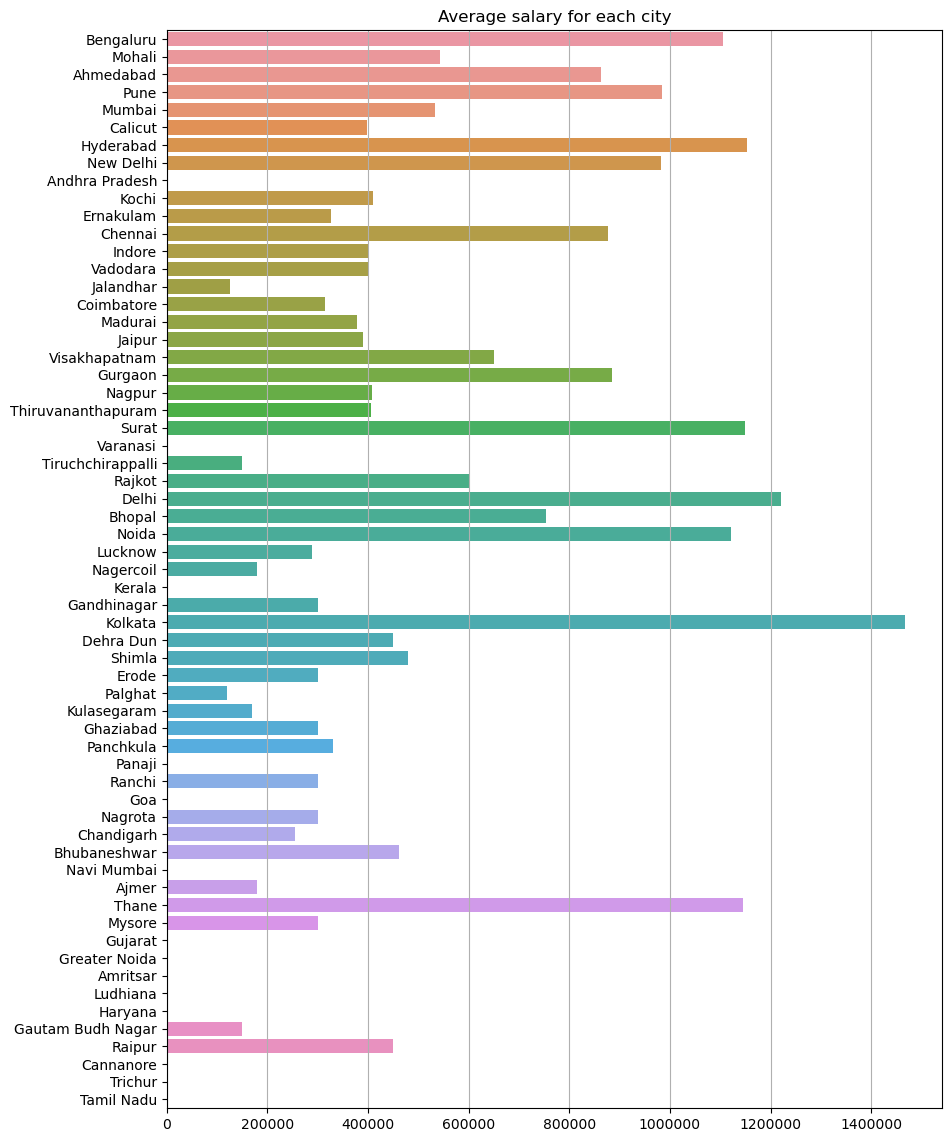

In [72]:
plt.figure(figsize=(10,14))
sns.barplot(y=list(average_sal.keys()),x=list(average_sal.values()))
plt.title("Average salary for each city")
plt.ticklabel_format(style='plain', axis='x',)
plt.grid(axis="x")
plt.show()

In [61]:
# Calculating average salary for each state

salary_df = np.array(df["Salary per year"])


average_sal = {}

for state in df["State"].unique():
    sal = salary_df[df["State"]==state]
    average_sal[state] = np.nanmean(sal)

for state, avg_salary in average_sal.items():
    print(f'City: {state}, Average Salary: {avg_salary:.2f}')

City: Karnataka, Average Salary: 1097160.31
City: Punjab, Average Salary: 511354.15
City: Gujarat, Average Salary: 1015061.12
City: Maharashtra, Average Salary: 839562.81
City: Kerala, Average Salary: 397867.57
City: Telangana, Average Salary: 1152359.63
City: Delhi, Average Salary: 1009223.61
City: Andhra Pradesh, Average Salary: 651000.00
City: Tamil Nadu, Average Salary: 695492.17
City: Madhya Pradesh, Average Salary: 547333.33
City: Rajasthan, Average Salary: 347200.00
City: Haryana, Average Salary: 841684.08
City: Uttar Pradesh, Average Salary: 917583.86
City: West Bengal, Average Salary: 1467142.86
City: Uttarakhand, Average Salary: 450000.00
City: Himachal Pradesh, Average Salary: 390000.00
City: Goa, Average Salary: nan
City: Jharkhand, Average Salary: 300000.00
City: Chandigarh, Average Salary: 254999.00
City: Orissa, Average Salary: 462000.00
City: nan, Average Salary: nan
City: Chhattisgarh, Average Salary: 450000.00


C:\Users\hp\AppData\Local\Temp\ipykernel_27520\2406353917.py:10: RuntimeWarning: Mean of empty slice
  average_sal[state] = np.nanmean(sal)


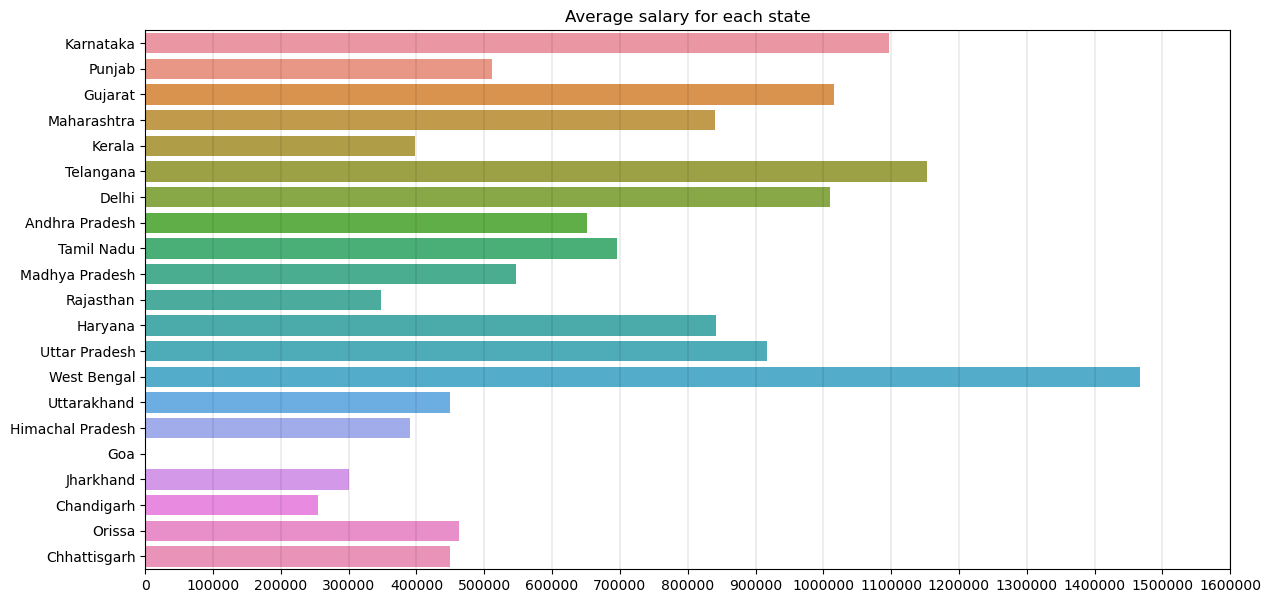

In [67]:

plt.figure(figsize=(14,7))
sns.barplot(y=list(average_sal.keys()),x=list(average_sal.values()))
plt.title("Average salary for each state")
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(range(0,1700000,100000))
plt.grid(axis="x",color="black",linewidth=0.1)
plt.show()